# <span style="color:darkblue"> Lecture 13: Logistic Regression for Classification
 </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the "sklearn" package

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Import stats models


# This is used to create data matrices
import patsy

<font size = "5" >

### <span style="color:darkblue">  II. Example: Diffusion of microfinance </span>

Banerjee et al. (2013) explored the effects of a marketing <br>
campaign in rural villages in Karnataka, India, on the   <br>
probability of requesting a microfinance loan.

https://www.science.org/doi/10.1126/science.1236498

We will use their data today.

<font size = "5">

The outcome variable <br>

$\quad Y_i = \text{RequestLoan}_i $

<font size = "5">

The predictor vector:

$\quad X_i = \begin{bmatrix} 1 \\ \text{ReceivedInfo}_i \\ \text{OwnsHouse}_i \\ \text{HomeNumRooms}_i \end{bmatrix} $



# <span style="color:darkblue"> III. Prepare Data </span>


<font size = "5">

Read microfinance data

In [45]:
dataset = pd.read_csv("data_raw/microfinance_data.csv")

<font size = "5">

Create "y" and "X" matrices from a formula. This allows for:

- Interactions
- Factors
- Polynomials

In [47]:
y, X = \
    patsy.dmatrices('request_loan ~ received_info + owns_house + home_numrooms',
                       dataset)
y = np.ravel(y)

<font size = "5">

Split the data into training and test

<font size = "3">

- "test_size" is a number between 0 and 1 that control the relative <br>
proportions of the training and test datasets.
- "random_state" is a seed that ensures that the training and test datasets <br>
can be replicated

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.5, random_state=42)

# <span style="color:darkblue"> IV. Fit model and evaluate classification accuracy </span>


<font size = "5">

Fit model on data using "Sk-learn"

In [5]:
model = LogisticRegression().fit(X_train,y_train)

<font size = "5">

Obtain vector of predicted probabilites on test set

Text(0.5, 1.0, 'Predicted Probabilities on Test Set')

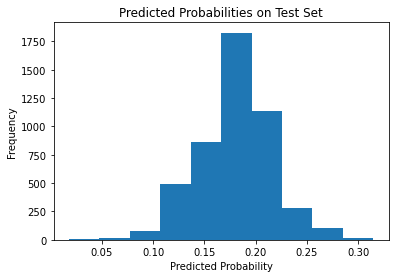

In [6]:
# Obtain predicted probabilities
mat_probabilities = pd.DataFrame(model.predict_proba(X_test))

# Obtain probabilites for the event 1 
# (This is the second column of "mat_probabilities")
vec_probabilities = mat_probabilities.iloc[:,1]

# Display results
plt.hist(x = vec_probabilities)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Predicted Probabilities on Test Set")

<font size = "5">

Classifying observations

- If probability is higher than 0.15 classify as 1
- Can change threshold

In [7]:
bins_y = [0,0.15, 1]
labels_y = [0,1]

predicted_labels = pd.cut(vec_probabilities,
                              bins = bins_y,
                              right = True,
                              labels = labels_y)

<font size = "5">

Obtain a confusion matrix

In [8]:
cm = confusion_matrix(y_test, predicted_labels)
cm

array([[1113, 2778],
       [ 222,  686]])

In [12]:
cmnew=cm/len(dataset)
cmnew

array([[0.11596166, 0.2894353 ],
       [0.02312982, 0.07147322]])

<font size = "5">

Display confusion matrix

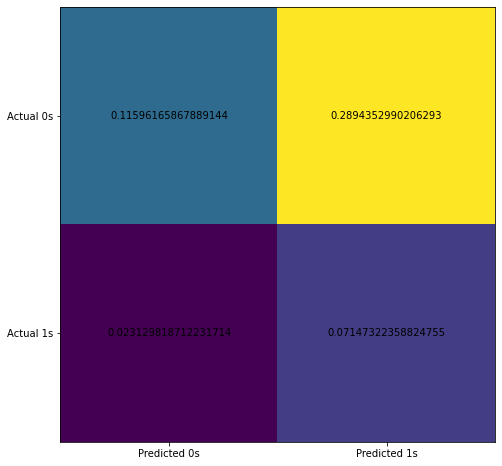

In [13]:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cmnew)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cmnew[i, j], ha='center', va='center')
plt.show()

# <span style="color:darkblue"> IV. Exercises </span>

<font size = "5">

Try it yourself

- Change the classification threshold
- How does this change the classification accuracy?


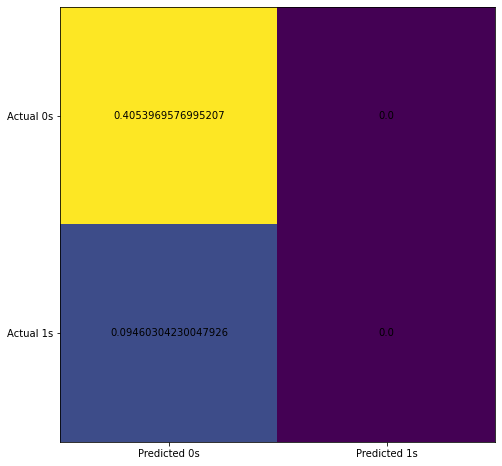

In [19]:
# Write your own code

bins_y = [0,0.4, 1]
labels_y = [0,1]

predicted_labels = pd.cut(vec_probabilities,
                              bins = bins_y,
                              right = True,
                              labels = labels_y)

cm1 = confusion_matrix(y_test, predicted_labels)
cm1

cmnew1=cm1/len(dataset)
cmnew1

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cmnew1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cmnew1[i, j], ha='center', va='center')
plt.show()

In [60]:
len(y_test)

4799

In [67]:
for i in np.arange(0.05, 0.5, 0.05):
    # Write your own code

    bins_y = [0,i, 1]
    labels_y = [0,1]

    predicted_labels = pd.cut(vec_probabilities,
                                  bins = bins_y,
                                  right = True,
                                  labels = labels_y)

    cm1 = confusion_matrix(y_test, predicted_labels)
    cm1

    cmnew1=cm1/len(y_test)
    display(cmnew1)

    
    

array([[0.00104188, 0.80975203],
       [0.        , 0.18920608]])

array([[0.01708689, 0.79370702],
       [0.00229214, 0.18691394]])

array([[0.23192332, 0.5788706 ],
       [0.04625964, 0.14294645]])

array([[0.70868931, 0.10210461],
       [0.15524068, 0.03396541]])

array([[0.79370702, 0.01708689],
       [0.18149615, 0.00770994]])

array([[0.80871015, 0.00208377],
       [0.18837258, 0.00083351]])

array([[0.81079392, 0.        ],
       [0.18920608, 0.        ]])

array([[0.81079392, 0.        ],
       [0.18920608, 0.        ]])

array([[0.81079392, 0.        ],
       [0.18920608, 0.        ]])

<font size = "5">

Try it yourself

- Add interactions between "Own rooms" and other independent variables
- Does this improve the classification accuracy?
 


[[ 5.26741007e-05  6.06075462e-01  2.18903962e-01 -2.90630246e-02
  -1.93678064e-01 -1.64004181e-01]]


4799

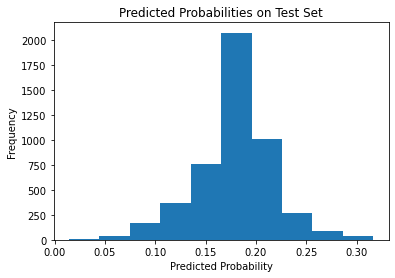

In [65]:
# Write your own code
y1, X1 = \
    patsy.dmatrices('request_loan ~ received_info + owns_house + home_numrooms + received_info*owns_house + owns_house*home_numrooms',
                       dataset)
y1 = np.ravel(y1)

X1_train, X1_test, y1_train, y1_test = train_test_split(
           X1, y1, test_size=0.5, random_state=42)

model1 = LogisticRegression().fit(X1_train,y1_train)
print(model1.coef_)

# Obtain predicted probabilities
mat_probabilities1 = pd.DataFrame(model1.predict_proba(X1_test))

# Obtain probabilites for the event 1 
# (This is the second column of "mat_probabilities")
vec_probabilities1 = mat_probabilities1.iloc[:,1]

# Display results
plt.hist(x = vec_probabilities1)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Predicted Probabilities on Test Set")
len(y1_test)

In [66]:
for i in np.arange(0.05, 0.5, 0.05):
    # Write your own code

    bins_y = [0,i, 1]
    labels_y = [0,1]

    predicted_labels1 = pd.cut(vec_probabilities1,
                                  bins = bins_y,
                                  right = True,
                                  labels = labels_y)

    cm2 = confusion_matrix(y1_test, predicted_labels1)
    cm2

    cmnew2=cm2/len(y1_test)
    display(cmnew2)


array([[0.00104188, 0.80975203],
       [0.        , 0.18920608]])

array([[0.01687852, 0.7939154 ],
       [0.00208377, 0.18712232]])

array([[0.23275682, 0.57803709],
       [0.04438425, 0.14482184]])

array([[0.582413  , 0.22838091],
       [0.12731819, 0.06188789]])

array([[0.79245676, 0.01833715],
       [0.18128777, 0.00791832]])

array([[0.80871015, 0.00208377],
       [0.18837258, 0.00083351]])

array([[0.81079392, 0.        ],
       [0.18920608, 0.        ]])

array([[0.81079392, 0.        ],
       [0.18920608, 0.        ]])

array([[0.81079392, 0.        ],
       [0.18920608, 0.        ]])

<font size = "5">